# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import imutils
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
#change the dataset path
DATASET_PATH = os.path.join("ASLdata") 
for file in os.listdir("ASLdata"):
    print(file)
    if file.endswith(".mp4"):
        path=os.path.join('ASLdata', file)
        print(path)        
        cap = cv2.VideoCapture(path)
        print(cap.isOpened())
# Set mediapipe model 
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            while cap.isOpened():
                ret, frame= cap.read()
                #frame = frame1[5:400, 6:400]
                if ret==True:
                    #print(frame)
                    #frame= imutils.resize(frame, width=520, height=420)
                # Make detections
                    frame= imutils.resize(frame, width=920, height=920)
                    image, results = mediapipe_detection(frame, holistic)
                    #print(results)
                    cv2.waitKey(5)
                    # Draw landmarks
                    draw_styled_landmarks(image, results)

                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break 
                else:
                    break

    else:
        break
        qq
    cap.release()
    cv2.destroyAllWindows()

000 - Copy.mp4
ASLdata\000 - Copy.mp4
True
000.mp4
ASLdata\000.mp4
True
013_004_005.mp4
ASLdata\013_004_005.mp4
True


KeyboardInterrupt: 

In [7]:
cap.release()
cv2.destroyAllWindows()

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

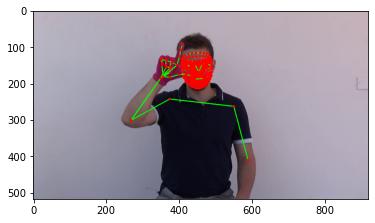

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
#len(results.left_hand_landmarks.landmark)

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    print(res)
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

x: 0.49547749757766724
y: 0.3273850679397583
z: -0.478220134973526
visibility: 0.9999884366989136

x: 0.5050799250602722
y: 0.28566840291023254
z: -0.4443057179450989
visibility: 0.9999717473983765

x: 0.5137395262718201
y: 0.28492122888565063
z: -0.4445875287055969
visibility: 0.9999715685844421

x: 0.5208847522735596
y: 0.28423354029655457
z: -0.4447070062160492
visibility: 0.9999691843986511

x: 0.4830649197101593
y: 0.28734153509140015
z: -0.44231054186820984
visibility: 0.9999683499336243

x: 0.4758119285106659
y: 0.287723183631897
z: -0.44238215684890747
visibility: 0.9999722242355347

x: 0.4686407446861267
y: 0.28805962204933167
z: -0.44255679845809937
visibility: 0.9999684691429138

x: 0.5324995517730713
y: 0.29774144291877747
z: -0.20900774002075195
visibility: 0.9999894499778748

x: 0.4604562222957611
y: 0.30178895592689514
z: -0.20029787719249725
visibility: 0.9999830722808838

x: 0.5103106498718262
y: 0.3627019226551056
z: -0.38787609338760376
visibility: 0.9999957084655762

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
print(pose)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

[ 4.95477498e-01  3.27385068e-01 -4.78220135e-01  9.99988437e-01
  5.05079925e-01  2.85668403e-01 -4.44305718e-01  9.99971747e-01
  5.13739526e-01  2.84921229e-01 -4.44587529e-01  9.99971569e-01
  5.20884752e-01  2.84233540e-01 -4.44707006e-01  9.99969184e-01
  4.83064920e-01  2.87341535e-01 -4.42310542e-01  9.99968350e-01
  4.75811929e-01  2.87723184e-01 -4.42382157e-01  9.99972224e-01
  4.68640745e-01  2.88059622e-01 -4.42556798e-01  9.99968469e-01
  5.32499552e-01  2.97741443e-01 -2.09007740e-01  9.99989450e-01
  4.60456222e-01  3.01788956e-01 -2.00297877e-01  9.99983072e-01
  5.10310650e-01  3.62701923e-01 -3.87876093e-01  9.99995708e-01
  4.81981605e-01  3.64490241e-01 -3.85386169e-01  9.99991953e-01
  5.99808216e-01  5.09030819e-01 -6.80680424e-02  9.99979615e-01
  4.07815069e-01  4.71405387e-01 -1.27861172e-01  9.99952435e-01
  6.41702354e-01  7.94393003e-01 -2.85680331e-02  9.89779830e-01
  2.92858839e-01  5.82969844e-01 -4.79569077e-01  9.99515533e-01
  6.26561224e-01  1.02989

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 4.95477498e-01,  3.27385068e-01, -4.78220135e-01,  9.99988437e-01,
        5.05079925e-01,  2.85668403e-01, -4.44305718e-01,  9.99971747e-01,
        5.13739526e-01,  2.84921229e-01, -4.44587529e-01,  9.99971569e-01,
        5.20884752e-01,  2.84233540e-01, -4.44707006e-01,  9.99969184e-01,
        4.83064920e-01,  2.87341535e-01, -4.42310542e-01,  9.99968350e-01,
        4.75811929e-01,  2.87723184e-01, -4.42382157e-01,  9.99972224e-01,
        4.68640745e-01,  2.88059622e-01, -4.42556798e-01,  9.99968469e-01,
        5.32499552e-01,  2.97741443e-01, -2.09007740e-01,  9.99989450e-01,
        4.60456222e-01,  3.01788956e-01, -2.00297877e-01,  9.99983072e-01,
        5.10310650e-01,  3.62701923e-01, -3.87876093e-01,  9.99995708e-01,
        4.81981605e-01,  3.64490241e-01, -3.85386169e-01,  9.99991953e-01,
        5.99808216e-01,  5.09030819e-01, -6.80680424e-02,  9.99979615e-01,
        4.07815069e-01,  4.71405387e-01, -1.27861172e-01,  9.99952435e-01,
        6.41702354e-01,  

In [18]:
33*4+21*3+21*3

258

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 4.95477498e-01,  3.27385068e-01, -4.78220135e-01,  9.99988437e-01,
        5.05079925e-01,  2.85668403e-01, -4.44305718e-01,  9.99971747e-01,
        5.13739526e-01,  2.84921229e-01, -4.44587529e-01,  9.99971569e-01,
        5.20884752e-01,  2.84233540e-01, -4.44707006e-01,  9.99969184e-01,
        4.83064920e-01,  2.87341535e-01, -4.42310542e-01,  9.99968350e-01,
        4.75811929e-01,  2.87723184e-01, -4.42382157e-01,  9.99972224e-01,
        4.68640745e-01,  2.88059622e-01, -4.42556798e-01,  9.99968469e-01,
        5.32499552e-01,  2.97741443e-01, -2.09007740e-01,  9.99989450e-01,
        4.60456222e-01,  3.01788956e-01, -2.00297877e-01,  9.99983072e-01,
        5.10310650e-01,  3.62701923e-01, -3.87876093e-01,  9.99995708e-01,
        4.81981605e-01,  3.64490241e-01, -3.85386169e-01,  9.99991953e-01,
        5.99808216e-01,  5.09030819e-01, -6.80680424e-02,  9.99979615e-01,
        4.07815069e-01,  4.71405387e-01, -1.27861172e-01,  9.99952435e-01,
        6.41702354e-01,  

# 4. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DataF') 

# Actions that we try to detect
actions = np.array(['Accept', 'Appear', 'Argentina', 'Away', 'Barbecue', 'Bathe', 'Birthday', 'Bitter', 'Born', 'Breakfast', 'Bright', 'Buy', 'Call', 'Candy', 'Catch', 'Chewing-gum', 'Coins', 'Copy', 'Country', 'Dance', 'Deaf', 'Drawer', 'Enemy', 'Find', 'Food', 'Give', 'Green', 'Help', 'Hungry', 'Last name', 'Learn', 'Light-blue', 'Man', 'Map', 'Milk', 'Mock', 'Music', 'None', 'Opaque', 'Patience', 'Perfume','Photo', 'Realize', 'Red', 'Red2', 'Rice', 'Run', 'Ship', 'Shut down', 'Skimmer', 'Son', 'Spaghetti', 'Sweet milk', 'Thanks', 'To land', 'Trap', 'Uruguay', 'Water', 'Where', 'Women', 'Yellow', 'Yogurt'])

# Thirty videos worth of data
no_sequences = 40

# Videos are going to be 30 frames in length
sequence_length = 5

In [27]:
# nothing
## 0
## 1
## 2
## ...
## 5
# all

#accident

In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [29]:
#set train video dataset path
DATASET_PATH = os.path.join("Train_videos") 
for file, action in zip(os.listdir("Train_videos"),actions):
    print(os.path.join("Train_videos", file))
    for file2, sequence2 in zip(os.listdir(os.path.join(DATASET_PATH, file)),range(no_sequences)):
        print(file2)
        print(sequence)
        if file2.endswith(".mp4"):
            pathroot=os.path.join(DATASET_PATH, file)
            path=os.path.join(pathroot, file2)
            #print(path)        
            cap = cv2.VideoCapture(path)
        # Set mediapipe model 
            with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic: 

                for sequence in range(sequence_length):
                    # Loop through video length aka sequence length
                    for frame_num in range(20):

                        # Read feed
                        ret, frame = cap.read()
                        if ret==True:
                        # Make detections
                            frame= imutils.resize(frame, width=920, height=920)
                            image, results = mediapipe_detection(frame, holistic)
            #                 print(results)

                            # Draw landmarks
                            draw_styled_landmarks(image, results)

                            # NEW Apply wait logic
                            if frame_num == 0: 
                                cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                                cv2.putText(image, 'Collecting frames for {} Frame Number {}'.format(action, sequence), (15,12), 
                                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                                # Show to screen
                                cv2.imshow('OpenCV Feed', image)
                                #cv2.waitKey(1000)
                            else: 
                                cv2.putText(image, 'Collecting frames for {} Frame Number {}'.format(action, sequence), (15,12), 
                                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                                # Show to screen
                                cv2.imshow('OpenCV Feed', image)

                            # NEW Export keypoints
                            #print(results.multi_hand_landmarks)
                            keypoints = extract_keypoints(results)
                            #print(np.array(keypoints).size)
                            npy_path = os.path.join(DATA_PATH, action, str(sequence2), str(sequence))
                            np.save(npy_path, keypoints)

                            # Break gracefully
                            if cv2.waitKey(10) & 0xFF == ord('q'):
                                break

            cap.release()
            cv2.destroyAllWindows()
                

Train_videos\Accept
050_001_001.mp4
49
050_001_002.mp4
4
050_001_003.mp4
4
050_001_004.mp4
4
050_001_005.mp4
4
050_002_001.mp4
4
050_002_002.mp4
4
050_002_003.mp4
4
050_002_004.mp4
4
050_002_005.mp4
4
050_003_001.mp4
4
050_003_002.mp4
4
050_003_003.mp4
4
050_003_004.mp4
4
050_003_005.mp4
4
050_004_001.mp4
4
050_004_002.mp4
4
050_004_003.mp4
4
050_004_004.mp4
4
050_004_005.mp4
4
050_005_001.mp4
4
050_005_002.mp4
4
050_005_003.mp4
4
050_005_004.mp4
4
050_005_005.mp4
4
050_006_001.mp4
4
050_006_002.mp4
4
050_006_003.mp4
4
050_006_004.mp4
4
050_006_005.mp4
4
050_007_001.mp4
4
050_007_002.mp4
4
050_007_003.mp4
4
050_007_004.mp4
4
050_007_005.mp4
4
050_008_001.mp4
4
050_008_002.mp4
4
050_008_003.mp4
4
050_008_004.mp4
4
050_008_005.mp4
4
050_009_001.mp4
4
050_009_002.mp4
4
050_009_003.mp4
4
050_009_004.mp4
4
050_009_005.mp4
4
050_010_001.mp4
4
050_010_002.mp4
4
050_010_003.mp4
4
050_010_004.mp4
4
050_010_005.mp4
4
Train_videos\Appear
053_001_001.mp4
4
053_001_002.mp4
4
053_001_003.mp4
4
053_0

015_010_001.mp4
4
015_010_002.mp4
4
015_010_003.mp4
4
015_010_004.mp4
4
015_010_005.mp4
4
Train_videos\Breakfast
031_001_001.mp4
4
031_001_002.mp4
4
031_001_003.mp4
4
031_001_004.mp4
4
031_001_005.mp4
4
031_002_001.mp4
4
031_002_002.mp4
4
031_002_003.mp4
4
031_002_004.mp4
4
031_002_005.mp4
4
031_003_001.mp4
4
031_003_002.mp4
4
031_003_003.mp4
4
031_003_004.mp4
4
031_003_005.mp4
4
031_004_001.mp4
4
031_004_002.mp4
4
031_004_003.mp4
4
031_004_004.mp4
4
031_004_005.mp4
4
031_005_001.mp4
4
031_005_002.mp4
4
031_005_003.mp4
4
031_005_004.mp4
4
031_005_005.mp4
4
031_006_001.mp4
4
031_006_002.mp4
4
031_006_003.mp4
4
031_006_004.mp4
4
031_006_005.mp4
4
031_007_001.mp4
4
031_007_002.mp4
4
031_007_003.mp4
4
031_007_004.mp4
4
031_007_005.mp4
4
031_008_001.mp4
4
031_008_002.mp4
4
031_008_003.mp4
4
031_008_004.mp4
4
031_008_005.mp4
4
031_009_001.mp4
4
031_009_002.mp4
4
031_009_003.mp4
4
031_009_004.mp4
4
031_009_005.mp4
4
031_010_001.mp4
4
031_010_002.mp4
4
031_010_003.mp4
4
031_010_004.mp4
4
031_0

007_009_002.mp4
4
007_009_003.mp4
4
007_009_004.mp4
4
007_009_005.mp4
4
007_010_001.mp4
4
007_010_002.mp4
4
007_010_003.mp4
4
007_010_004.mp4
4
007_010_005.mp4
4
Train_videos\Copy
060_001_001.mp4
4
060_001_002.mp4
4
060_001_003.mp4
4
060_001_004.mp4
4
060_001_005.mp4
4
060_002_001.mp4
4
060_002_002.mp4
4
060_002_003.mp4
4
060_002_004.mp4
4
060_002_005.mp4
4
060_003_001.mp4
4
060_003_002.mp4
4
060_003_003.mp4
4
060_003_004.mp4
4
060_003_005.mp4
4
060_004_001.mp4
4
060_004_002.mp4
4
060_004_003.mp4
4
060_004_004.mp4
4
060_004_005.mp4
4
060_005_001.mp4
4
060_005_002.mp4
4
060_005_003.mp4
4
060_005_004.mp4
4
060_005_005.mp4
4
060_006_001.mp4
4
060_006_002.mp4
4
060_006_003.mp4
4
060_006_004.mp4
4
060_006_005.mp4
4
060_007_001.mp4
4
060_007_002.mp4
4
060_007_003.mp4
4
060_007_004.mp4
4
060_007_005.mp4
4
060_008_001.mp4
4
060_008_002.mp4
4
060_008_003.mp4
4
060_008_004.mp4
4
060_008_005.mp4
4
060_009_001.mp4
4
060_009_002.mp4
4
060_009_003.mp4
4
060_009_004.mp4
4
060_009_005.mp4
4
060_010_00

063_008_003.mp4
4
063_008_004.mp4
4
063_008_005.mp4
4
063_009_001.mp4
4
063_009_002.mp4
4
063_009_003.mp4
4
063_009_004.mp4
4
063_009_005.mp4
4
063_010_001.mp4
4
063_010_002.mp4
4
063_010_003.mp4
4
063_010_004.mp4
4
063_010_005.mp4
4
Train_videos\Green
003_001_001.mp4
4
003_001_002.mp4
4
003_001_003.mp4
4
003_001_004.mp4
4
003_001_005.mp4
4
003_002_001.mp4
4
003_002_002.mp4
4
003_002_003.mp4
4
003_002_004.mp4
4
003_002_005.mp4
4
003_003_001.mp4
4
003_003_002.mp4
4
003_003_003.mp4
4
003_003_004.mp4
4
003_003_005.mp4
4
003_004_001.mp4
4
003_004_002.mp4
4
003_004_003.mp4
4
003_004_004.mp4
4
003_004_005.mp4
4
003_005_001.mp4
4
003_005_002.mp4
4
003_005_003.mp4
4
003_005_004.mp4
4
003_005_005.mp4
4
003_006_001.mp4
4
003_006_002.mp4
4
003_006_003.mp4
4
003_006_004.mp4
4
003_006_005.mp4
4
003_007_001.mp4
4
003_007_002.mp4
4
003_007_003.mp4
4
003_007_004.mp4
4
003_007_005.mp4
4
003_008_001.mp4
4
003_008_002.mp4
4
003_008_003.mp4
4
003_008_004.mp4
4
003_008_005.mp4
4
003_009_001.mp4
4
003_009_0

021_007_004.mp4
4
021_007_005.mp4
4
021_008_001.mp4
4
021_008_002.mp4
4
021_008_003.mp4
4
021_008_004.mp4
4
021_008_005.mp4
4
021_009_001.mp4
4
021_009_002.mp4
4
021_009_003.mp4
4
021_009_004.mp4
4
021_009_005.mp4
4
021_010_001.mp4
4
021_010_002.mp4
4
021_010_003.mp4
4
021_010_004.mp4
4
021_010_005.mp4
4
Train_videos\Mock
029_001_001.mp4
4
029_001_002.mp4
4
029_001_003.mp4
4
029_001_004.mp4
4
029_001_005.mp4
4
029_002_001.mp4
4
029_002_002.mp4
4
029_002_003.mp4
4
029_002_004.mp4
4
029_002_005.mp4
4
029_003_001.mp4
4
029_003_002.mp4
4
029_003_003.mp4
4
029_003_004.mp4
4
029_003_005.mp4
4
029_004_001.mp4
4
029_004_002.mp4
4
029_004_003.mp4
4
029_004_004.mp4
4
029_004_005.mp4
4
029_005_001.mp4
4
029_005_002.mp4
4
029_005_003.mp4
4
029_005_004.mp4
4
029_005_005.mp4
4
029_006_001.mp4
4
029_006_002.mp4
4
029_006_003.mp4
4
029_006_004.mp4
4
029_006_005.mp4
4
029_007_001.mp4
4
029_007_002.mp4
4
029_007_003.mp4
4
029_007_004.mp4
4
029_007_005.mp4
4
029_008_001.mp4
4
029_008_002.mp4
4
029_008_00

062_006_005.mp4
4
062_007_001.mp4
4
062_007_002.mp4
4
062_007_003.mp4
4
062_007_004.mp4
4
062_007_005.mp4
4
062_008_001.mp4
4
062_008_002.mp4
4
062_008_003.mp4
4
062_008_004.mp4
4
062_008_005.mp4
4
062_009_001.mp4
4
062_009_002.mp4
4
062_009_003.mp4
4
062_009_004.mp4
4
062_009_005.mp4
4
062_010_001.mp4
4
062_010_002.mp4
4
062_010_003.mp4
4
062_010_004.mp4
4
062_010_005.mp4
4
Train_videos\Red
002_001_001.mp4
4
002_001_002.mp4
4
002_001_003.mp4
4
002_001_004.mp4
4
002_001_005.mp4
4
002_002_001.mp4
4
002_002_002.mp4
4
002_002_003.mp4
4
002_002_004.mp4
4
002_002_005.mp4
4
002_003_001.mp4
4
002_003_002.mp4
4
002_003_003.mp4
4
002_003_004.mp4
4
002_003_005.mp4
4
002_004_001.mp4
4
002_004_002.mp4
4
002_004_003.mp4
4
002_004_004.mp4
4
002_004_005.mp4
4
002_005_001.mp4
4
002_005_002.mp4
4
002_005_003.mp4
4
002_005_004.mp4
4
002_005_005.mp4
4
002_006_001.mp4
4
002_006_002.mp4
4
002_006_003.mp4
4
002_006_004.mp4
4
002_006_005.mp4
4
002_007_001.mp4
4
002_007_002.mp4
4
002_007_003.mp4
4
002_007_004

048_006_001.mp4
4
048_006_002.mp4
4
048_006_003.mp4
4
048_006_004.mp4
4
048_006_005.mp4
4
048_007_001.mp4
4
048_007_002.mp4
4
048_007_003.mp4
4
048_007_004.mp4
4
048_007_005.mp4
4
048_008_001.mp4
4
048_008_002.mp4
4
048_008_003.mp4
4
048_008_004.mp4
4
048_008_005.mp4
4
048_009_001.mp4
4
048_009_002.mp4
4
048_009_003.mp4
4
048_009_004.mp4
4
048_009_005.mp4
4
048_010_001.mp4
4
048_010_002.mp4
4
048_010_003.mp4
4
048_010_004.mp4
4
048_010_005.mp4
4
Train_videos\Sweet milk
020_001_001.mp4
4
020_001_002.mp4
4
020_001_003.mp4
4
020_001_004.mp4
4
020_001_005.mp4
4
020_002_001.mp4
4
020_002_002.mp4
4
020_002_003.mp4
4
020_002_004.mp4
4
020_002_005.mp4
4
020_003_001.mp4
4
020_003_002.mp4
4
020_003_003.mp4
4
020_003_004.mp4
4
020_003_005.mp4
4
020_004_001.mp4
4
020_004_002.mp4
4
020_004_003.mp4
4
020_004_004.mp4
4
020_004_005.mp4
4
020_005_001.mp4
4
020_005_002.mp4
4
020_005_003.mp4
4
020_005_004.mp4
4
020_005_005.mp4
4
020_006_001.mp4
4
020_006_002.mp4
4
020_006_003.mp4
4
020_006_004.mp4
4
020_

In [55]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
DATA_PATH = os.path.join('MP_DataF-train') 
DATA_PATH2 = os.path.join('MP_DataF-test') 

In [25]:
#train
sequences, labels = [], []
for action in actions:
    for sequence in range(40):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            #print(np.array(res).size)
            window.append(res)
            #print(window)
        sequences.append(window)
        #print(sequences)
        labels.append(label_map[action])
       

In [26]:
sequences2, labels2 = [], []
for action in actions:
    for sequence in range(10):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH2, action, str(sequence), "{}.npy".format(frame_num)))
            #print(np.array(res).size)
            window.append(res)
            #print(window)
        sequences2.append(window)
        #print(sequences)
        labels2.append(label_map[action])
        

In [27]:
np.array(sequences).shape

(2480, 5, 258)

In [28]:
y_test = np.reshape(labels2, (620, 1))
np.array(y_test).shape

(620, 1)

In [29]:
X_train = np.array(sequences)
X_test =np.array(sequences2)

In [30]:
y_test = to_categorical(labels2).astype(int)

In [31]:
y_train =to_categorical(labels).astype(int)

In [32]:
y_train
y_train.shape

(2480, 62)

In [33]:
X_train.shape
#y_test.shape

(2480, 5, 258)

# 7. Build and Train LSTM-based model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(5, 258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
res = [.7, 0.2, 0.1,0.5,0.8,0.6]


In [38]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])


Epoch 1/200
78/78 [==============================] - 4s 12ms/step - loss: 4.0204 - categorical_accuracy: 0.0190ETA: 0s - loss: 4.1257 - 
Epoch 2/200
78/78 [==============================] - 1s 12ms/step - loss: 3.6287 - categorical_accuracy: 0.0403
Epoch 3/200
78/78 [==============================] - 1s 12ms/step - loss: 3.3566 - categorical_accuracy: 0.0714
Epoch 4/200
78/78 [==============================] - 1s 12ms/step - loss: 3.1130 - categorical_accuracy: 0.0887
Epoch 5/200
78/78 [==============================] - 1s 12ms/step - loss: 2.9986 - categorical_accuracy: 0.1198
Epoch 6/200
78/78 [==============================] - 1s 12ms/step - loss: 2.6245 - categorical_accuracy: 0.2040
Epoch 7/200
78/78 [==============================] - 1s 12ms/step - loss: 2.3691 - categorical_accuracy: 0.2629
Epoch 8/200
78/78 [==============================] - 1s 12ms/step - loss: 2.1306 - categorical_accuracy: 0.3258
Epoch 9/200
78/78 [==============================] - 1s 12ms/step - loss: 1.928

78/78 [==============================] - 1s 12ms/step - loss: 0.1656 - categorical_accuracy: 0.9472
Epoch 74/200
78/78 [==============================] - 1s 12ms/step - loss: 0.1605 - categorical_accuracy: 0.9552
Epoch 75/200
78/78 [==============================] - 1s 12ms/step - loss: 0.1193 - categorical_accuracy: 0.9577
Epoch 76/200
78/78 [==============================] - 1s 13ms/step - loss: 0.1251 - categorical_accuracy: 0.9593
Epoch 77/200
78/78 [==============================] - 1s 13ms/step - loss: 0.0659 - categorical_accuracy: 0.9766
Epoch 78/200
78/78 [==============================] - 1s 13ms/step - loss: 0.1428 - categorical_accuracy: 0.9565
Epoch 79/200
78/78 [==============================] - 1s 12ms/step - loss: 0.1834 - categorical_accuracy: 0.9371
Epoch 80/200
78/78 [==============================] - 1s 12ms/step - loss: 0.0786 - categorical_accuracy: 0.9738
Epoch 81/200
78/78 [==============================] - 1s 13ms/step - loss: 0.1928 - categorical_accuracy: 0.9

78/78 [==============================] - 1s 12ms/step - loss: 0.0262 - categorical_accuracy: 0.9915
Epoch 146/200
78/78 [==============================] - 1s 12ms/step - loss: 0.0081 - categorical_accuracy: 0.9968
Epoch 147/200
78/78 [==============================] - 1s 12ms/step - loss: 0.0073 - categorical_accuracy: 0.9996
Epoch 148/200
78/78 [==============================] - 1s 12ms/step - loss: 0.0043 - categorical_accuracy: 0.9988
Epoch 149/200
78/78 [==============================] - 1s 11ms/step - loss: 0.0017 - categorical_accuracy: 0.9996
Epoch 150/200
78/78 [==============================] - 1s 11ms/step - loss: 0.0033 - categorical_accuracy: 0.9988
Epoch 151/200
78/78 [==============================] - 1s 11ms/step - loss: 0.0361 - categorical_accuracy: 0.9891
Epoch 152/200
78/78 [==============================] - 1s 11ms/step - loss: 0.2462 - categorical_accuracy: 0.9282
Epoch 153/200
78/78 [==============================] - 1s 11ms/step - loss: 0.1067 - categorical_accur

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             82688     
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 62)                2046      
                                                                 
Total params: 239,198
Trainable params: 239,198
Non-trai

In [41]:
# Train
#model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

In [42]:
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")

20/20 [==============================] - 1s 5ms/step - loss: 1.7870 - categorical_accuracy: 0.7355
Test accuracy: 73.55%


# 8. Make Predictions

In [43]:
res = model.predict(X_test)

In [44]:
for i in range(619):

    print('Model output: ',actions[np.argmax(res[i])])
    print('Actual output: ',actions[np.argmax(y_test[i])])
    

Model output:  Accept
Actual output:  Accept
Model output:  Red
Actual output:  Accept
Model output:  Shut down
Actual output:  Accept
Model output:  Barbecue
Actual output:  Accept
Model output:  Red
Actual output:  Accept
Model output:  Green
Actual output:  Accept
Model output:  Accept
Actual output:  Accept
Model output:  Accept
Actual output:  Accept
Model output:  Accept
Actual output:  Accept
Model output:  Thanks
Actual output:  Accept
Model output:  Ship
Actual output:  Appear
Model output:  Appear
Actual output:  Appear
Model output:  Appear
Actual output:  Appear
Model output:  Breakfast
Actual output:  Appear
Model output:  Shut down
Actual output:  Appear
Model output:  Appear
Actual output:  Appear
Model output:  Appear
Actual output:  Appear
Model output:  Appear
Actual output:  Appear
Model output:  Appear
Actual output:  Appear
Model output:  Appear
Actual output:  Appear
Model output:  Argentina
Actual output:  Argentina
Model output:  Argentina
Actual output:  Argent

Actual output:  Spaghetti
Model output:  Spaghetti
Actual output:  Spaghetti
Model output:  Spaghetti
Actual output:  Spaghetti
Model output:  Spaghetti
Actual output:  Spaghetti
Model output:  Copy
Actual output:  Sweet milk
Model output:  Copy
Actual output:  Sweet milk
Model output:  Sweet milk
Actual output:  Sweet milk
Model output:  Sweet milk
Actual output:  Sweet milk
Model output:  Copy
Actual output:  Sweet milk
Model output:  Sweet milk
Actual output:  Sweet milk
Model output:  Sweet milk
Actual output:  Sweet milk
Model output:  Sweet milk
Actual output:  Sweet milk
Model output:  Sweet milk
Actual output:  Sweet milk
Model output:  Sweet milk
Actual output:  Sweet milk
Model output:  Breakfast
Actual output:  Thanks
Model output:  Opaque
Actual output:  Thanks
Model output:  Opaque
Actual output:  Thanks
Model output:  Breakfast
Actual output:  Thanks
Model output:  Thanks
Actual output:  Thanks
Model output:  Ship
Actual output:  Thanks
Model output:  Coins
Actual output:

In [45]:
actions[np.argmax(y_test[2])]

'Accept'

# 9. Save Weights

In [47]:
model.save('action.h5')

In [163]:
trained_model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [82]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [84]:
yhat = trained_model.predict(X_test)

In [85]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [86]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[  0,   0],
        [918,  12]],

       [[906,  24],
        [  0,   0]],

       [[917,  13],
        [  0,   0]],

       [[916,  14],
        [  0,   0]],

       [[918,  12],
        [  0,   0]],

       [[920,  10],
        [  0,   0]],

       [[917,  13],
        [  0,   0]],

       [[913,  17],
        [  0,   0]],

       [[916,  14],
        [  0,   0]],

       [[914,  16],
        [  0,   0]],

       [[914,  16],
        [  0,   0]],

       [[914,  16],
        [  0,   0]],

       [[900,  30],
        [  0,   0]],

       [[923,   7],
        [  0,   0]],

       [[915,  15],
        [  0,   0]],

       [[919,  11],
        [  0,   0]],

       [[914,  16],
        [  0,   0]],

       [[915,  15],
        [  0,   0]],

       [[915,  15],
        [  0,   0]],

       [[917,  13],
        [  0,   0]],

       [[913,  17],
        [  0,   0]],

       [[911,  19],
        [  0,   0]],

       [[921,   9],
        [  0,   0]],

       [[926,   4],
        [  0, 

In [87]:
accuracy_score(ytrue, yhat)

0.012903225806451613

# 11. Test in Real Time

In [89]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-18:]

In [103]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.6

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-5:]
        
        if len(sequence) == 5:
            res = trained_model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(image, 'Collecting frames for {}'.format(len(sequence)), (25,32), 
                                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(900) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Enemy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Enemy
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Born
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Born
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deaf
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Accept
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Learn
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Shut down
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Yellow
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Yellow
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Patience
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Patience
<class

In [119]:
cap.release()
cv2.destroyAllWindows()

In [76]:
res[np.argmax(res)] > threshold

True

In [78]:
(60,18,1662)

(60, 18, 1662)

In [79]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[7.1993120e-11, 1.4309568e-29, 9.9994814e-01, 4.1384763e-30,
        5.1894232e-05, 3.3388570e-16]], dtype=float32)